In [4]:
import src as esma #Import library
num_core = 8 #Define number of cores

In [5]:
#Step 1 - Initialize model
model = esma.pw(project_id="Si") #Define project
model.get_structure(format='poscar') #Load structure
model.get_primitive() #Get primitive cell
model.ecutwfc(80) #Set wavefunction cutoff
model.k_points(6) #Set number of k points

In [6]:
#Step 2 - Crystal optimization
model.vc_relax(num_core)

vc-relax is finished


In [7]:
#Step 3 - Atomic optimization
model.get_structure('vc-relax') #Get vc-relaxed strucutre
model.relax(num_core)

relax is finished


In [8]:
#Step 4 - Scf calculation
model.get_structure('relax') #Get relaxed strucutre
model.scf(num_core)

scf is finished


In [9]:
#Step 5 - Bands calculation
path = ['L','GAMMA','X','K','GAMMA'] #define corners
model.bands(path=path,num_points=40, num_core=num_core)

bands is finished
bands-pp is finished


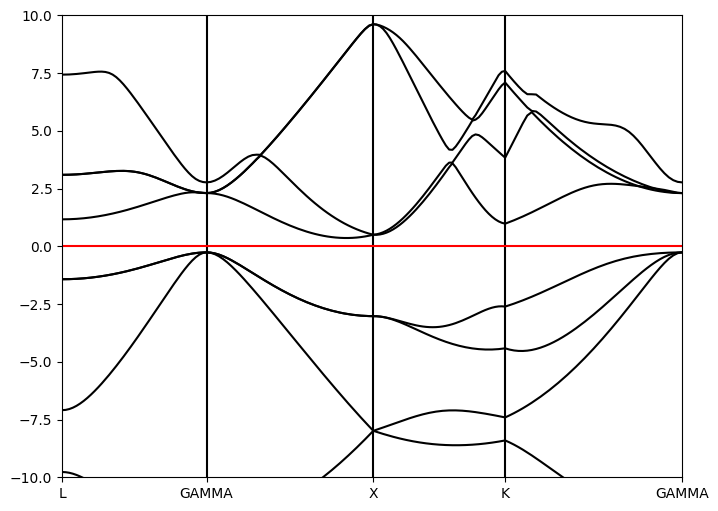

In [10]:
#Step 6 - Plotting
model.plot_electron(ylim=[-10,10],save=True) #plot electron bands